# **INSTALLATION**

In [ ]:
# !pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
# !pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 22 kB/s 


# **Drive Mounting**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Imports and Image**

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd
import seaborn as sn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
IMAGE_SIZE = [224, 224]

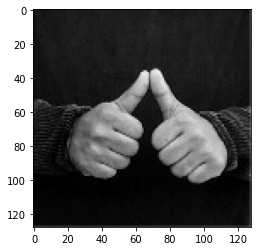

In [15]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/ISL/DataSet"
CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break
  break

# **PreProcessing**

In [16]:
image_generator = ImageDataGenerator(
                                     rescale=1./255, 
                                     preprocessing_function=preprocess_input,
                                     validation_split=0.2, 
                                     rotation_range=35,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     fill_mode='nearest'
                                   )    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/ISL/DataSet',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 color_mode = 'rgb',
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/ISL/DataSet',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 color_mode = 'rgb',
                                                 subset="validation",
                                                 class_mode='categorical')

Found 24984 images belonging to 26 classes.
Found 6246 images belonging to 26 classes.


In [18]:
print(validation_dataset[0])

(array([[[[-0.33309415, -0.4305059 , -0.45756865],
         [-0.33393082, -0.43134257, -0.45840532],
         [-0.33584392, -0.4332557 , -0.46031845],
         ...,
         [-0.32684824, -0.42426   , -0.4591659 ],
         [-0.325251  , -0.42266276, -0.45756865],
         [-0.325251  , -0.42266276, -0.45756865]],

        [[-0.33660176, -0.43401352, -0.46107626],
         [-0.33309415, -0.4305059 , -0.45756865],
         [-0.33309415, -0.4305059 , -0.45756865],
         ...,
         [-0.325251  , -0.42266276, -0.45756865],
         [-0.325251  , -0.42266276, -0.45756865],
         [-0.325251  , -0.42266276, -0.45756865]],

        [[-0.34878042, -0.44619218, -0.47325492],
         [-0.34383726, -0.441249  , -0.46831176],
         [-0.3361848 , -0.43359655, -0.4606593 ],
         ...,
         [-0.325251  , -0.42266276, -0.45756865],
         [-0.325251  , -0.42266276, -0.45756865],
         [-0.325251  , -0.42266276, -0.45756865]],

        ...,

        [[-0.33309415, -0.31285885, -

# **VGG**

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(26, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# **MODEL**

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(),
              metrics = ["accuracy"])

In [ ]:
batch_size = 32

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    train_dataset,
    epochs = 15,
    steps_per_epoch = len(train_dataset) // batch_size,
    validation_data = validation_dataset,
    validation_steps = len(validation_dataset) // batch_size,
    callbacks = callback
)

Epoch 1/15
24/24 [==============================] - 499s 21s/step - loss: 4.3353 - accuracy: 0.7695 - val_loss: 0.6715 - val_accuracy: 0.9635
Epoch 2/15
24/24 [==============================] - 499s 21s/step - loss: 0.3082 - accuracy: 0.9740 - val_loss: 0.1886 - val_accuracy: 0.9896
Epoch 3/15
24/24 [==============================] - 498s 21s/step - loss: 0.1200 - accuracy: 0.9883 - val_loss: 0.0533 - val_accuracy: 0.9948
Epoch 4/15
24/24 [==============================] - 500s 21s/step - loss: 0.1494 - accuracy: 0.9909 - val_loss: 0.0996 - val_accuracy: 0.9896
Epoch 5/15
24/24 [==============================] - 499s 21s/step - loss: 0.0268 - accuracy: 0.9974 - val_loss: 0.0284 - val_accuracy: 0.9948
Epoch 6/15
24/24 [==============================] - 499s 21s/step - loss: 0.1829 - accuracy: 0.9909 - val_loss: 0.1089 - val_accuracy: 0.9896
Epoch 7/15
24/24 [==============================] - 499s 21s/step - loss: 0.0817 - accuracy: 0.9922 - val_loss: 0.0295 - val_accuracy: 0.9896
Epoch 

# **Saving and Loading Model**

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/ISL_CNN_VGG.h5")

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/ISL_CNN_VGG.h5")

# **Confusion Matrix**

In [ ]:
classifier1 = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/Layers_Variation/7/ISL_CNN_7MXRL.h5")

In [ ]:
Y_pred = classifier1.predict(validation_dataset, len(validation_dataset) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_dataset.classes, y_pred))
print('Classification Report')
target_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
print(classification_report(validation_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 9 11  8  6  8 12 10 11  8  5  8  5 11 12 10  8 14  9  9  7 10 11  9 11
  11  7]
 [13 12  7  9 14  6  8  6  9 11 14 14 10 11  8 11  2  7  7  6 12 10  9  9
   7  8]
 [11  8  9 10 13  8  9  9 11 11  7  9 12 12  3  9  8  5 14 11 11  8 12  6
   5 11]
 [10 13 11 10  6  4  5 11  7  8  9 13 11  7 12 10 15  9  5  8 14 11  5 11
   7  8]
 [ 9  9  5  9  4  8  7 13 11  6 16  9 12 12 11  8  7 12 15  8  8  7 11  7
   9  7]
 [ 8  5 11 11 15 14 11 18  5  9  5  8  5 10  8  8 10  9  9  7 13  8  5 10
   9  9]
 [ 9 11 10 10  5 10 12  6  8 10 14 11 11 11  7  7  5 12 13  6  6  6 10 13
   8 11]
 [ 7  6 12  9  9  9 10 14  7  4  8 11  5 10  9 20  9  5 13 11 16 10 16  5
   3  4]
 [ 8 13 10  9  9  7  8 10  6  6  7  5  9 15  9 10 13  6 11  9  8  9 11  8
  11 13]
 [13  5  5  6 13 12 13 10 15  7 10  8  5 10 12 11  9 13  5  7  6  9  6 11
   8 11]
 [12 10  8 11  9  8 11 11  1  9  5 13  8  7  9  8 11 13  5 12  6 15  8  9
  11 10]
 [11  5  9  9 16  7  5  8  9  8 12  9  5 10 13  8  5  7 10 12 11 14 12

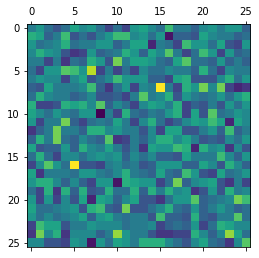

In [ ]:
plt.matshow(confusion_matrix(validation_dataset.classes, y_pred))

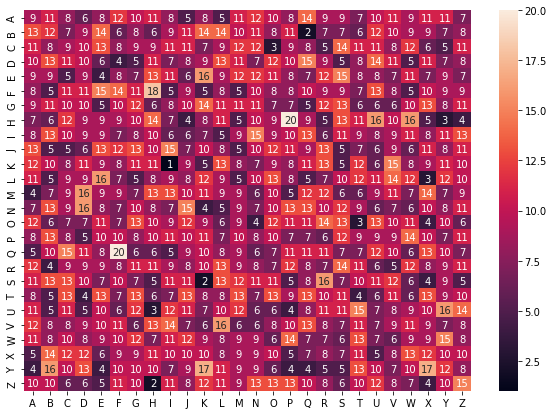

In [ ]:
array = confusion_matrix(validation_dataset.classes, y_pred)
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
print(validation_dataset.classes)

[ 0  0  0 ... 25 25 25]


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[ 7 14 17 ...  1 20  2]


In [ ]:
print(Y_pred)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.0279875e-38]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


# **CHECKING PERFORMANCE**

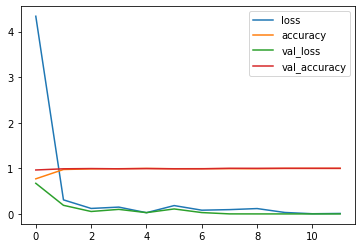

In [ ]:
Grap_Data = pd.DataFrame(history.history)
Grap_Data.plot()

No handles with labels found to put in legend.


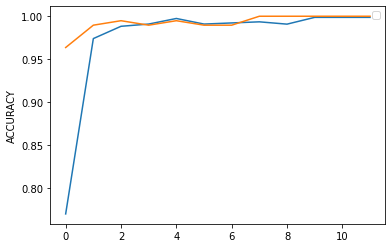

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


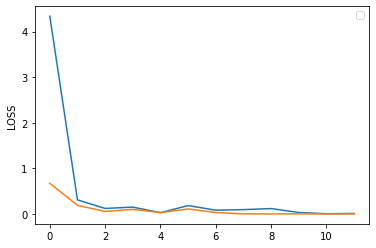

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()